In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


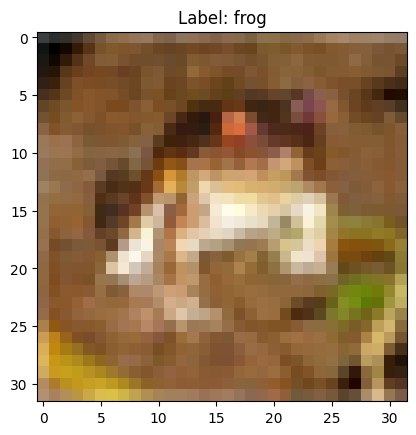

In [3]:

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first image in the dataset
plt.imshow(x_train[0])  # Show the first image
plt.title(f"Label: {class_names[y_train[0][0]]}")  # Show the label
plt.show()


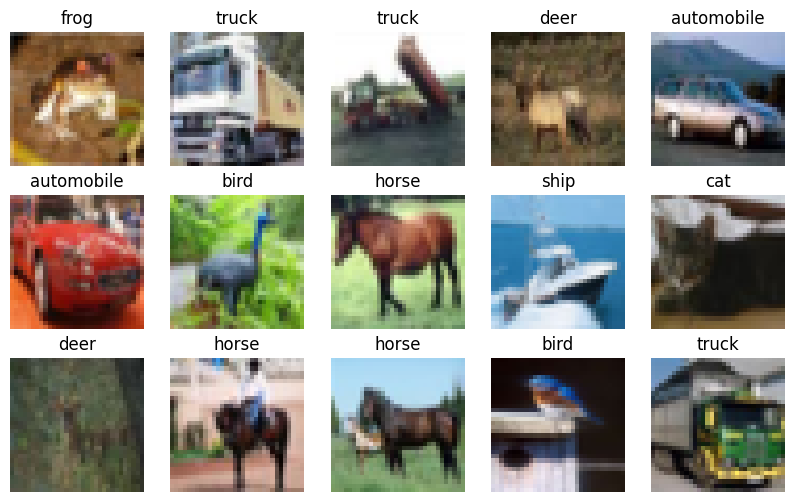

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))  # Create a grid of images

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])  # Show image
    ax.set_title(class_names[y_train[i][0]])  # Show label
    ax.axis("off")  # Hide axes

plt.show()


In [5]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3639 - loss: 1.7252 - val_accuracy: 0.5224 - val_loss: 1.3226
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5888 - loss: 1.1596 - val_accuracy: 0.6056 - val_loss: 1.1359
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.6603 - loss: 0.9660 - val_accuracy: 0.6576 - val_loss: 0.9807
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7026 - loss: 0.8506 - val_accuracy: 0.6784 - val_loss: 0.9318
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7339 - loss: 0.7661 - val_accuracy: 0.7013 - val_loss: 0.8719
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 50ms/step - accuracy: 0.7577 - loss: 0.6951 - val_accuracy: 0.6959 - val_loss: 0.9173
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7786 - loss: 0.6307 - val_accuracy: 0.7038 - val_loss: 0.8710
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7965 

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 5s - 17ms/step - accuracy: 0.7102 - loss: 1.8133
Test accuracy: 0.7102000117301941


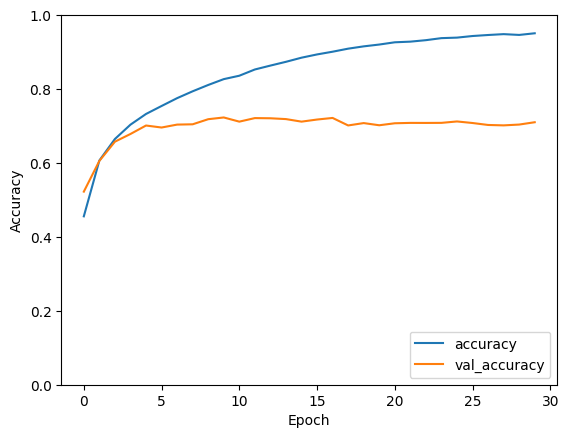

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [11]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


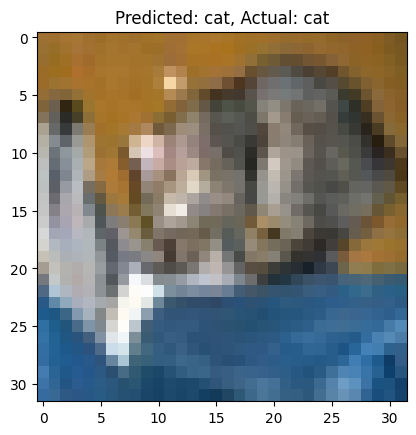

In [12]:

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select an image to display
index = 0  # Change index to see different images
plt.imshow(x_test[index])

# Convert numeric labels to class names
predicted_class = class_names[predicted_labels[index]]
actual_class = class_names[y_test[index][0]]

plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.show()


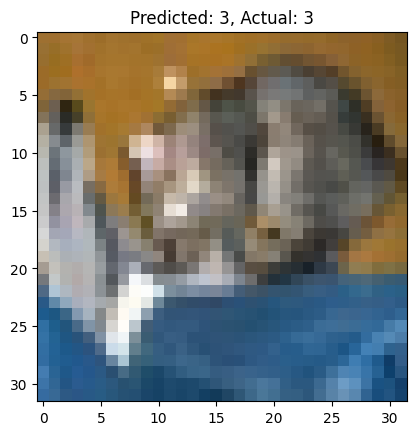

In [13]:
# Display a sample image with its predicted label
index = 0  # Change index to see different images
plt.imshow(x_test[index])
plt.title(f"Predicted: {predicted_labels[index]}, Actual: {y_test[index][0]}")
plt.show()